# Analysis of the flight ticket price

### Introduction

* The objective of the study is to analyze the flight booking dataset obtained from “Ease My Trip” website. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

### Problem statement

* We have sample data listing flight tickets price. We have to find or analyze the flight tickets price vary on any column or not and if vary then which columns are more responsible for that.

### Source of dataset

* We collected the dataset from [kaggle.com](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction)

### Size of dataset

* Size of airline_dataset is 24.68 MB

### About the dataset

* Dataset contains information about flight booking from the website Easemytrip for flight travel between India's top 6 metro cities. 
* Dataset contains 11 columns namely - 'Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time','destination_city', 'class', 'duration', 'days_left', 'price'.

### Liberaries
* Numpy
* Pandas
* Matplotlib
* Seaborn


### Overview of the Features

* Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
* Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
* Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
* Departure Time: It stores information about the departure time and have 6 unique time labels.
* Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
* Arrival Time:It has six distinct time labels and keeps information about the arrival time.
* Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
* Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
* Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
* Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
* Price: Target variable stores information of the ticket price.

### Data preprocessing

## Importing required liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
df=pd.read_csv('airline_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [5]:
df.sample(3)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
135301,135301,Vistara,UK-776,Kolkata,Evening,zero,Night,Mumbai,Economy,2.75,48,4499
213348,213348,Vistara,UK-951,Delhi,Afternoon,one,Night,Bangalore,Business,6.58,19,42457
111455,111455,Vistara,UK-808,Bangalore,Early_Morning,one,Night,Hyderabad,Economy,14.92,17,6577


In [6]:
df.shape

(300153, 12)

In [7]:
df.size

3601836

### Get basic information about the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


### Generate a table of descriptive satistics

In [9]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


### Various features in airline dataset

In [10]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

### Type of each feature in dataset

In [11]:
df.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

### Checking missing value of each columns

In [12]:
df.isna().sum()/len(df)*100

Unnamed: 0          0.0
airline             0.0
flight              0.0
source_city         0.0
departure_time      0.0
stops               0.0
arrival_time        0.0
destination_city    0.0
class               0.0
duration            0.0
days_left           0.0
price               0.0
dtype: float64

### Checking duplicate value

In [13]:
df.duplicated().sum()

0

### Checking number of unique values of each column

In [14]:
df.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

### Checking unique values of each column

In [15]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [16]:
df['flight'].unique()

array(['SG-8709', 'SG-8157', 'I5-764', ..., '6E-7127', '6E-7259',
       'AI-433'], dtype=object)

In [17]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [18]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [19]:
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [20]:
df['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [21]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [22]:
df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

### Dropping the columns Unnamed: 0

In [23]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

* Dropped the column that I did not need for the prediction.
* I dropped column Unnamed:0.

### Below I again check columns after I dropping column

In [24]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

# Exploratory Data Analysis

### 1) Does price vary with Airlines?

In [25]:
df.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [26]:
df.groupby('airline')['price'].mean()

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

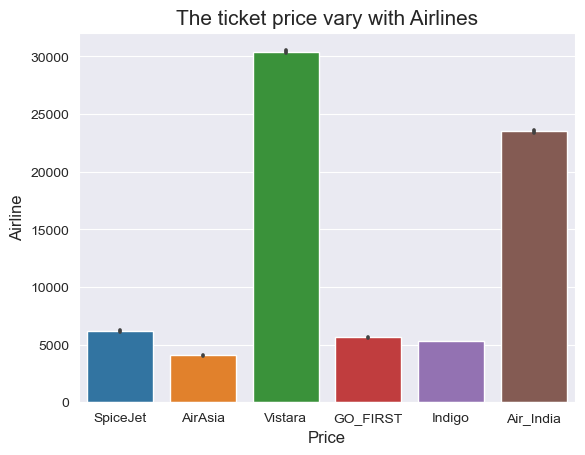

In [27]:
sns.set_style('darkgrid')
sns.barplot(x='airline',y='price',data=df)
plt.title('The ticket price vary with Airlines',fontsize=15)
plt.xlabel('Price',fontsize=12)
plt.ylabel('Airline',fontsize=12)
plt.savefig('price_airline')
plt.show()

#### From the above graph, we can conclude that:
##### Vistara airline average ticket price is very high(around 30000 rs) and AirAsia average ticket price is much less(around 5000 rs)compare to other airlines.
    

### 2) How is the price affected when tickets are bought in just 1 or 2 days before departure?

In [28]:
last_minute_ticket=df[(df['days_left']==1) | (df['days_left']==2)]

In [29]:
df[(df['airline']== 'Vistara') & (df['flight']=='UK-995')]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
153,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,2,6375
255,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,3,5955
407,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,4,5955
580,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,5,5955
...,...,...,...,...,...,...,...,...,...,...,...
224821,Vistara,UK-995,Delhi,Morning,one,Night,Chennai,Business,12.75,47,57992
224888,Vistara,UK-995,Delhi,Morning,one,Evening,Chennai,Business,9.58,48,57992
224891,Vistara,UK-995,Delhi,Morning,one,Night,Chennai,Business,12.75,48,57992
224956,Vistara,UK-995,Delhi,Morning,one,Evening,Chennai,Business,9.58,49,57992


In [30]:
last_minute_ticket

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
298090,Vistara,UK-838,Chennai,Night,one,Evening,Hyderabad,Business,22.83,2,66129
298091,Vistara,UK-834,Chennai,Evening,one,Morning,Hyderabad,Business,16.50,2,82784
298092,Vistara,UK-834,Chennai,Evening,one,Afternoon,Hyderabad,Business,19.42,2,82784
298093,Vistara,UK-834,Chennai,Evening,one,Evening,Hyderabad,Business,23.83,2,82784


In [31]:
avg_price_last_min=last_minute_ticket['price'].mean()

In [32]:
avg_price_last_min

27421.169326390056

In [33]:
avg_price_overall= df['price'].mean()

In [34]:
avg_price_overall

20889.660523133203

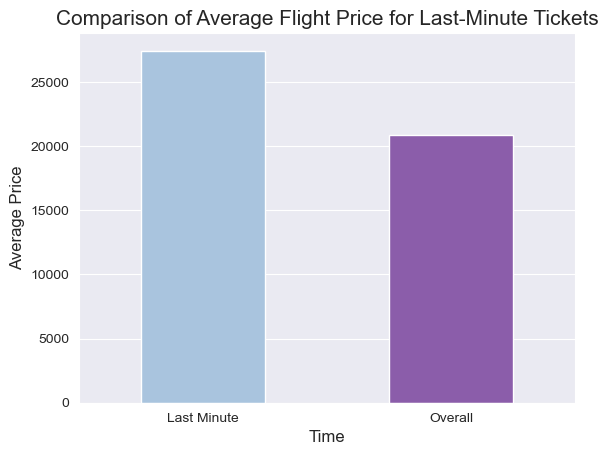

In [35]:
sns.set_style('darkgrid')
sns.barplot(x=['Last Minute', 'Overall'],y=[avg_price_last_min, avg_price_overall],width=0.5,palette='BuPu',saturation=1.4)
plt.ylabel('Average Price')
plt.title('Comparison of Average Flight Price for Last-Minute Tickets',fontsize=15)
plt.xlabel('Time',fontsize=12)
plt.ylabel('Average Price',fontsize=12)
plt.show()

#### From the above graph, we can conclude that:
##### The flights overall avg ticket prices are around 20000 rs but the last minute avg ticket prices which were sold in just 1 or 2 days before departure are very high over 25000 rs.

### 3) Does ticket price change based on the departure time and arrival time?

In [36]:
df.groupby('departure_time')['price'].mean()

departure_time
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Late_Night        9295.299387
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64

In [37]:
df.groupby('arrival_time')['price'].mean()

arrival_time
Afternoon        18494.598993
Early_Morning    14993.139521
Evening          23044.371615
Late_Night       11284.906078
Morning          22231.076098
Night            21586.758341
Name: price, dtype: float64

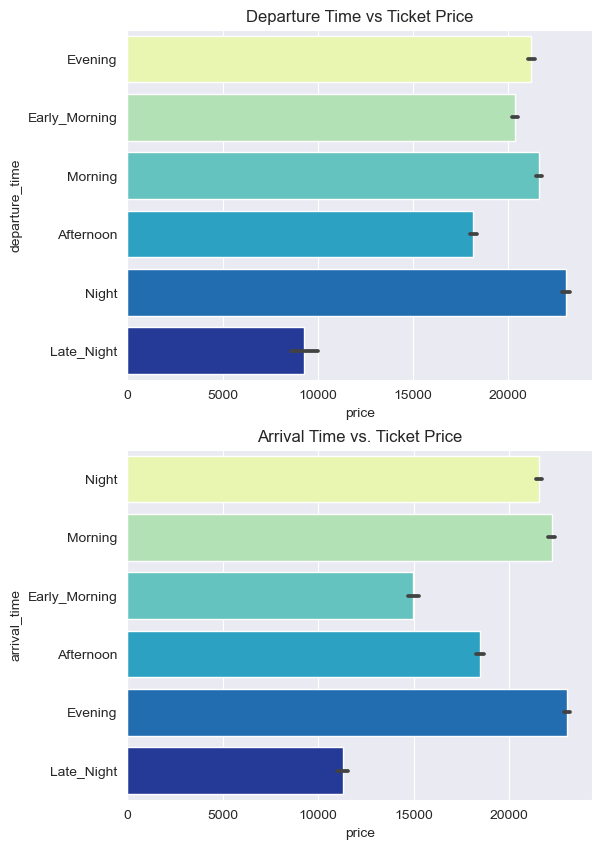

In [38]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,10))
plt.subplot(2,1,1)
sns.barplot(y='departure_time',x='price',data=df,palette='YlGnBu',saturation=1.4)
plt.title('Departure Time vs Ticket Price')

plt.subplot(2,1,2)
sns.barplot(y='arrival_time',x='price',data=df,palette='YlGnBu',saturation=1.4)
plt.title('Arrival Time vs. Ticket Price')
plt.show()

#### From the above two graps,we can see that:
##### Flight ticket prices are lowest during late night hours and highest during the night in the Departure Time vs. Ticket Price graph
##### In the Arrival time vs Ticket price graph, the flight ticket prices are lowest during late night hours and highest during the evening


### 4) How the price changes with change in Source and Destination?

In [39]:
df.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


In [40]:
df.groupby(['source_city'])['price'].mean()

source_city
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839
Name: price, dtype: float64

In [41]:
df.groupby(['destination_city'])['price'].mean()

destination_city
Bangalore    21593.955784
Chennai      21953.323969
Delhi        18436.767870
Hyderabad    20427.661284
Kolkata      21959.557556
Mumbai       21372.529469
Name: price, dtype: float64

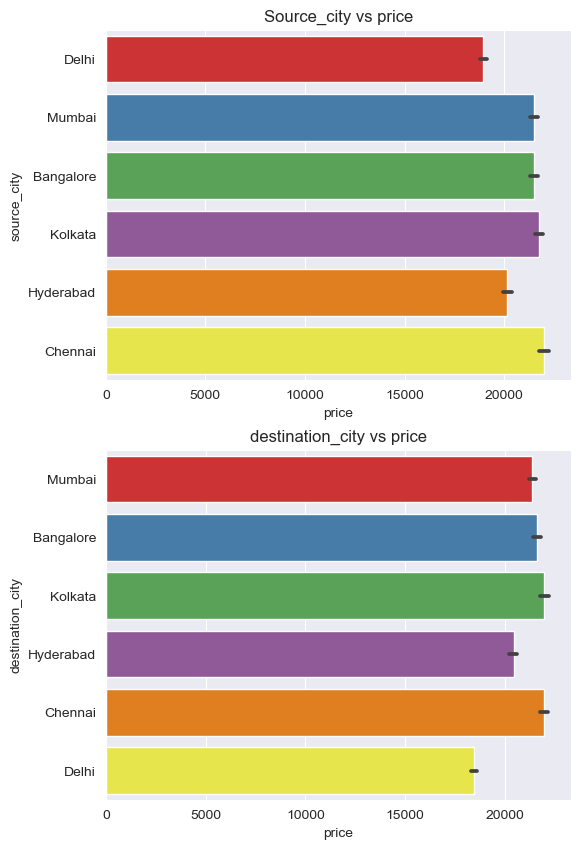

In [42]:
plt.figure(figsize=(6,10))
plt.subplot(2,1,1)
sns.barplot(y='source_city',x='price',data=df,palette='Set1')
plt.title('Source_city vs price')
plt.subplot(2,1,2)
sns.barplot(y='destination_city',x='price',data=df,palette='Set1')
plt.title('destination_city vs price')
plt.show()

#### From the above both graphs, we can see that:
##### "Here we can see in both graphs, as a source and destination city, the average flight ticket price for Chennai is very high (around 22,000 INR), while Delhi's average flight ticket price is very low (around 19,000 INR) compared to other source and destination cities."

### 5) How does the ticket price vary between Economy and Business class?

In [43]:
df.groupby('class')['price'].mean()

class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64

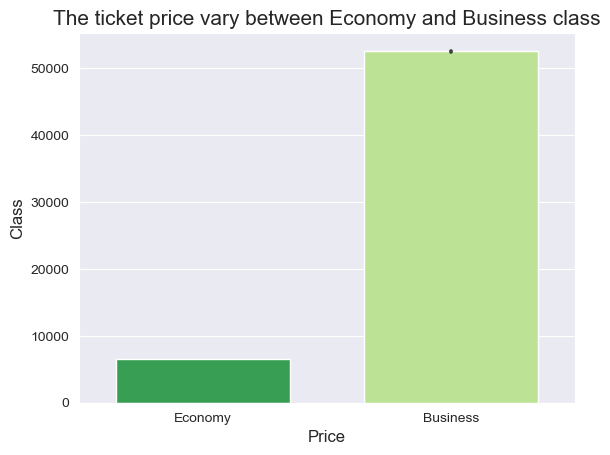

In [44]:
sns.set_style('darkgrid')
sns.barplot(x='class',y='price',data=df,palette='YlGn_r',saturation=1.4,width=0.7)
plt.title('The ticket price vary between Economy and Business class',fontsize=15)
plt.xlabel('Price',fontsize=12)
plt.ylabel('Class',fontsize=12)
plt.show()

#### From the above graph , we can see that:
##### Here business class average ticket price is much higher(over 50000) than economy class (below 10000).

### 6) How does stops column affect ticket price? 

In [45]:
df.groupby('stops')['price'].mean()

stops
one            22900.992482
two_or_more    14113.450775
zero            9375.938535
Name: price, dtype: float64

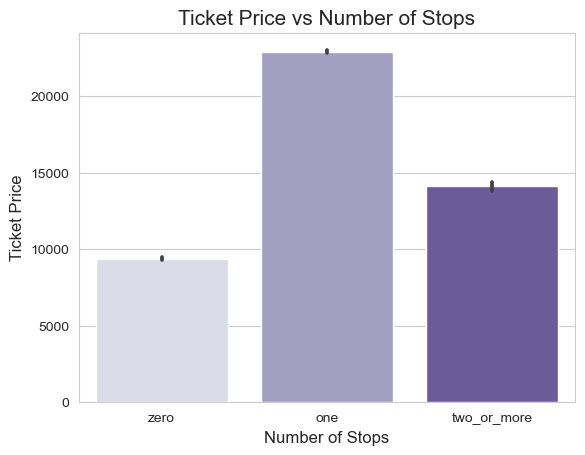

In [46]:
sns.set_style('whitegrid')
sns.barplot(x='stops',y='price',data=df,palette='Purples')
plt.title('Ticket Price vs Number of Stops',fontsize=15)
plt.xlabel('Number of Stops',fontsize=12)
plt.ylabel('Ticket Price',fontsize=12)
plt.savefig('stops')
plt.show()

#### From the above graph, we can see that:
##### The flights those were taking one stop between the source and destination cities have higher ticket prices over 20000 rupees.
##### The flights those were taking zero stop between the source and destination cities have lowest ticket prices around 10000 rupees.

### 7) Do flight durations play a significant role in ticket pricing?

In [47]:
df['duration'].corr(df['price'])

0.20422236784542758

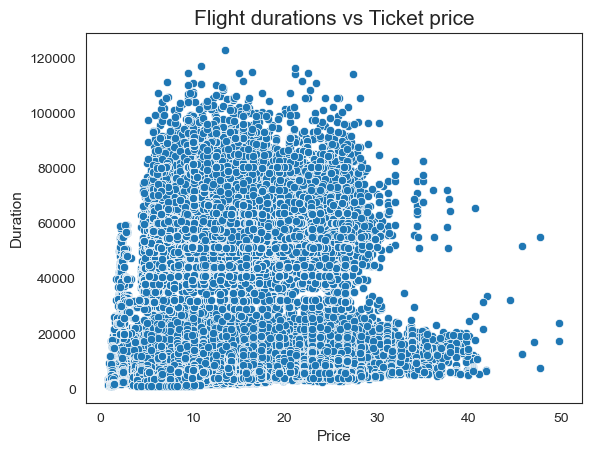

In [48]:
sns.set_style('white')
sns.scatterplot(x='duration',y='price',data=df)
plt.title('Flight durations vs Ticket price',fontsize=15)
plt.xlabel('Price',fontsize=11)
plt.ylabel('Duration',fontsize=11)
plt.savefig('scatter')
plt.show()

#### From the above graph, we can see:
##### Here flight duration do not play a significant role in ticket pricing and we can't see any significant relationship between price and duration.

### 8) What is the overall distribution of prices in the dataset?

In [49]:
df['price'].describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

C:\Users\prodi\AppData\Local\Temp\ipykernel_5124\809642002.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


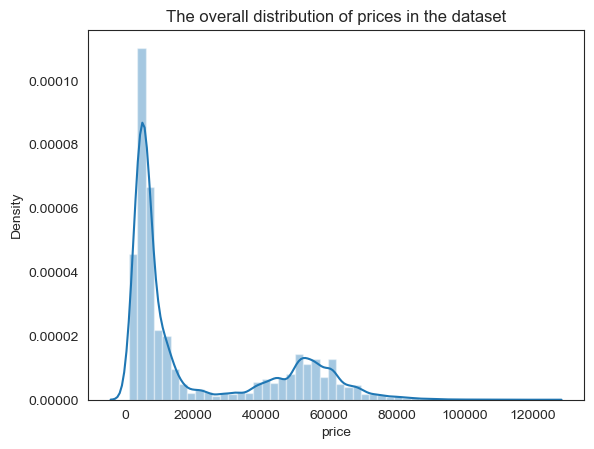

In [50]:
sns.set_style('white')
sns.distplot(df['price'])
plt.title( 'The overall distribution of prices in the dataset')
plt.show()

* Here, we can see that most travelers flight ticket prices came between 1105 rs to under 20000 rs.

### 9)Are there any outliers in the price column that significantly affect the analysis?

In [51]:
df.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


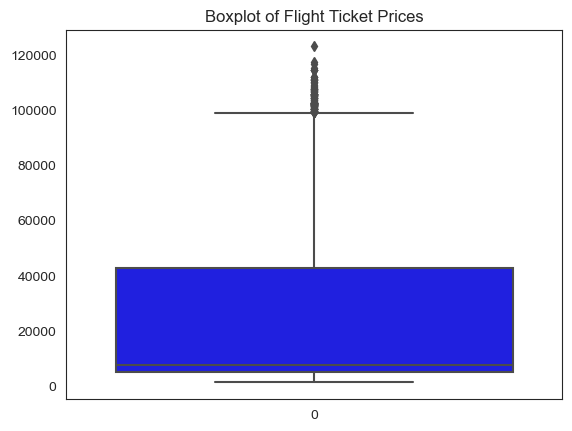

In [52]:
sns.boxplot(df['price'],color='blue')
plt.title('Boxplot of Flight Ticket Prices')
plt.show()

* Here, we can see multiple outliers are present in the price column that significantly affect the analysis.

### 10. Can we identify any specific combinations of factors (e.g., airline, class, stops) that consistently lead to higher or lower ticket prices?

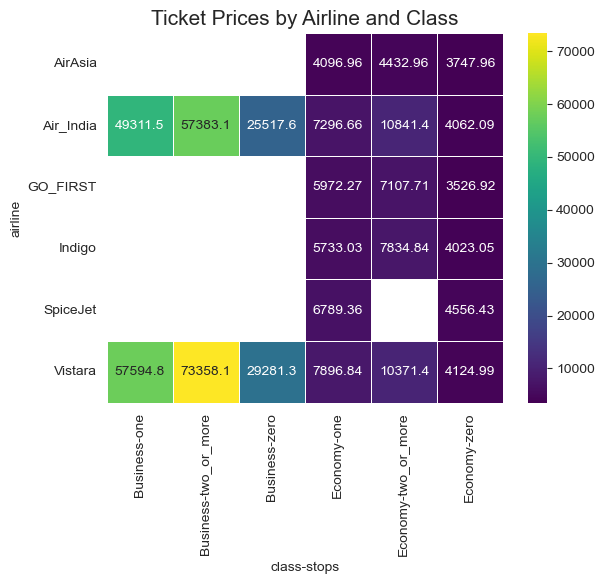

In [53]:
heatmap_data = df.pivot_table(index='airline', columns=['class', 'stops'], values='price', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Ticket Prices by Airline and Class',fontsize=15)
plt.savefig('heatmap')
plt.show()

### From the above graph, we can see:
##### Business class flights with two or more stops from Vistara Airlines have the highest ticket prices. Conversely, economy class flights with zero stops from GO_FIRST airline have the lowest ticket prices.